# TP 3: segmentation and classification of PreTest signals
Topics:
-  Noisy labels
-  Imbalanced dataset
-  Feature extraction
-  Dimension reduction

In [1]:
import json
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import plotly.graph_objects as go
from sklearn.manifold import TSNE

## Classification

In [3]:
with open('buildups_public.json', 'r') as f:
    buildups_json = json.load(f)
list(buildups_json[0].keys())

['station_reference',
 'drawdown_start_idx',
 'drawdown_end_idx',
 'buildup_start_idx',
 'buildup_end_idx',
 'drawdown_volume',
 'drawdown_pressure',
 'buildup_volume',
 'buildup_pressure',
 'buildup_label']

In [4]:
buildup_pressure = [p['buildup_pressure'] for p in buildups_json]
labels = [p['buildup_label'] for p in buildups_json]
labels = [0 if l=='Tight' else 1 for l in labels]
len(buildup_pressure)

242

### Interpolate so that every pressure test has a length of 200

In [26]:
pressure_interp = []
for p in buildup_pressure:
    p_interp = np.interp(np.linspace(0, 1, 200), np.linspace(0, 1, len(p)), p)
    pressure_interp.append(p_interp)
    

### Normalization

In [27]:
#normalize pressure using a scaler
pretests_normalized = []
for p in pressure_interp:
    ####################
    #pretests_normalized.append(p_normalized)

    #norlmaliwe with min-max
    p_normalized = (p - np.min(p)) / (np.max(p) - np.min(p))
    pretests_normalized.append(p_normalized)

### NaN values?

In [28]:
print('Are there any nan values?')
np.isnan(pretests_normalized).any()

Are there any nan values?


False

### Visualization
-  All the pressure in 1 single plot (normal: green, tight: red)
-  Dimension reduction (PCA, manually; TSNE)

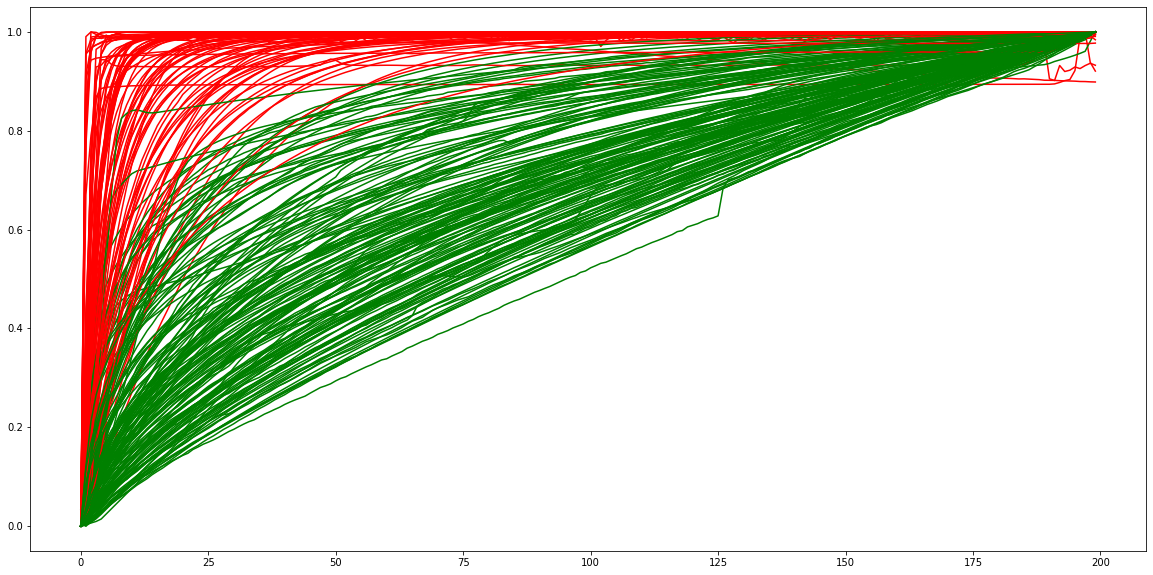

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
for i in range(len(pretests_normalized)):
    if labels[i] == 0:
        plt.plot(pretests_normalized[i], color='green')
    else:
        plt.plot(pretests_normalized[i], color='red')


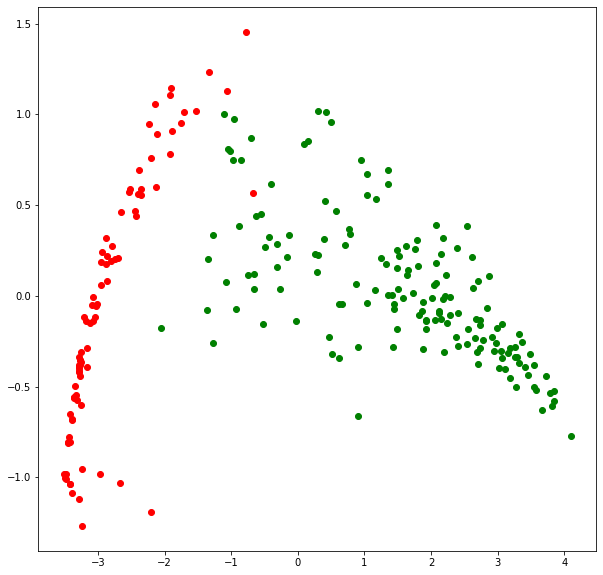

In [30]:
#apply PCA to the pressure data and visualize the results
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(pretests_normalized)
pretests_pca = pca.transform(pretests_normalized)

plt.figure(figsize=(10,10))
for i in range(len(pretests_pca)):
    if labels[i] == 0:
        plt.scatter(pretests_pca[i,0], pretests_pca[i,1], color='green')
    else:
        plt.scatter(pretests_pca[i,0], pretests_pca[i,1], color='red')

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


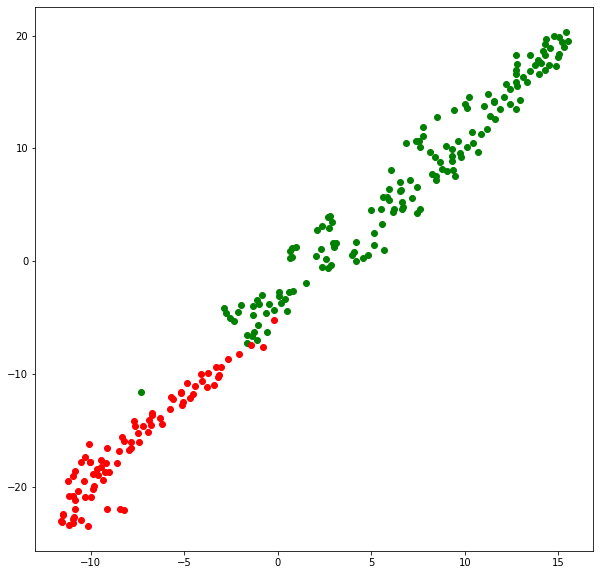

In [31]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
tsne.fit(pretests_normalized)
pretests_tsne = tsne.fit_transform(pretests_normalized)

plt.figure(figsize=(10,10))
for i in range(len(pretests_tsne)):
    if labels[i] == 0:
        plt.scatter(pretests_tsne[i,0], pretests_tsne[i,1], color='green')
    else:
        plt.scatter(pretests_tsne[i,0], pretests_tsne[i,1], color='red')

## Adding noisy labels

In [32]:
np.random.seed(0) 
index = np.random.choice(len(pretests_normalized), int(0.2*len(pretests_normalized)))
pretests_noisy_labels = np.copy(pretests_normalized)
labels_noisy = np.copy(labels)
print(index)
labels_noisy[index] = 1-labels_noisy[index]

[172  47 117 192  67 195 103   9 211  21  36  87  70 216  88 140  58 193
 230  39  87 174  88  81 165  25  77  72   9 148 115 208 197  79 175 192
  82  99 216 177  29 147 147 142 167  32 193   9]


## Imbalanced datasets

In [33]:
pretests_imbalanced = np.copy(pretests_normalized)
labels_imbalanced = np.copy(labels)

index_sort = np.argsort(labels_imbalanced)
labels_imbalanced = labels_imbalanced[index_sort]
pretests_imbalanced = pretests_imbalanced[index_sort]

num_tight = np.sum(labels_imbalanced == 0)
num_normal = np.sum(labels_imbalanced == 1)

# we would like num_tight/(num_tight+num_normal) = 0.4
rate = 0.2
num_skipped = num_tight - int(num_normal*rate/(1-rate))

pretests_imbalanced = pretests_imbalanced[num_skipped:]
labels_imbalanced = labels_imbalanced[num_skipped:]

## Models
-  Several models
-  Hyperparameter tuning
-  Results in function of noisy rate and imbalanced rate

In [ ]:
# Feature extraction

In [ ]:
train_buildup, test_buildup, train_label, test_lable = train_test_split(pretests_normalized, labels)
#model = #

## Confusion matrix